In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import transformations as tf

In [ ]:
TRANSF1 = 'pitchshift'
TRANSF2 = 'timestretch'

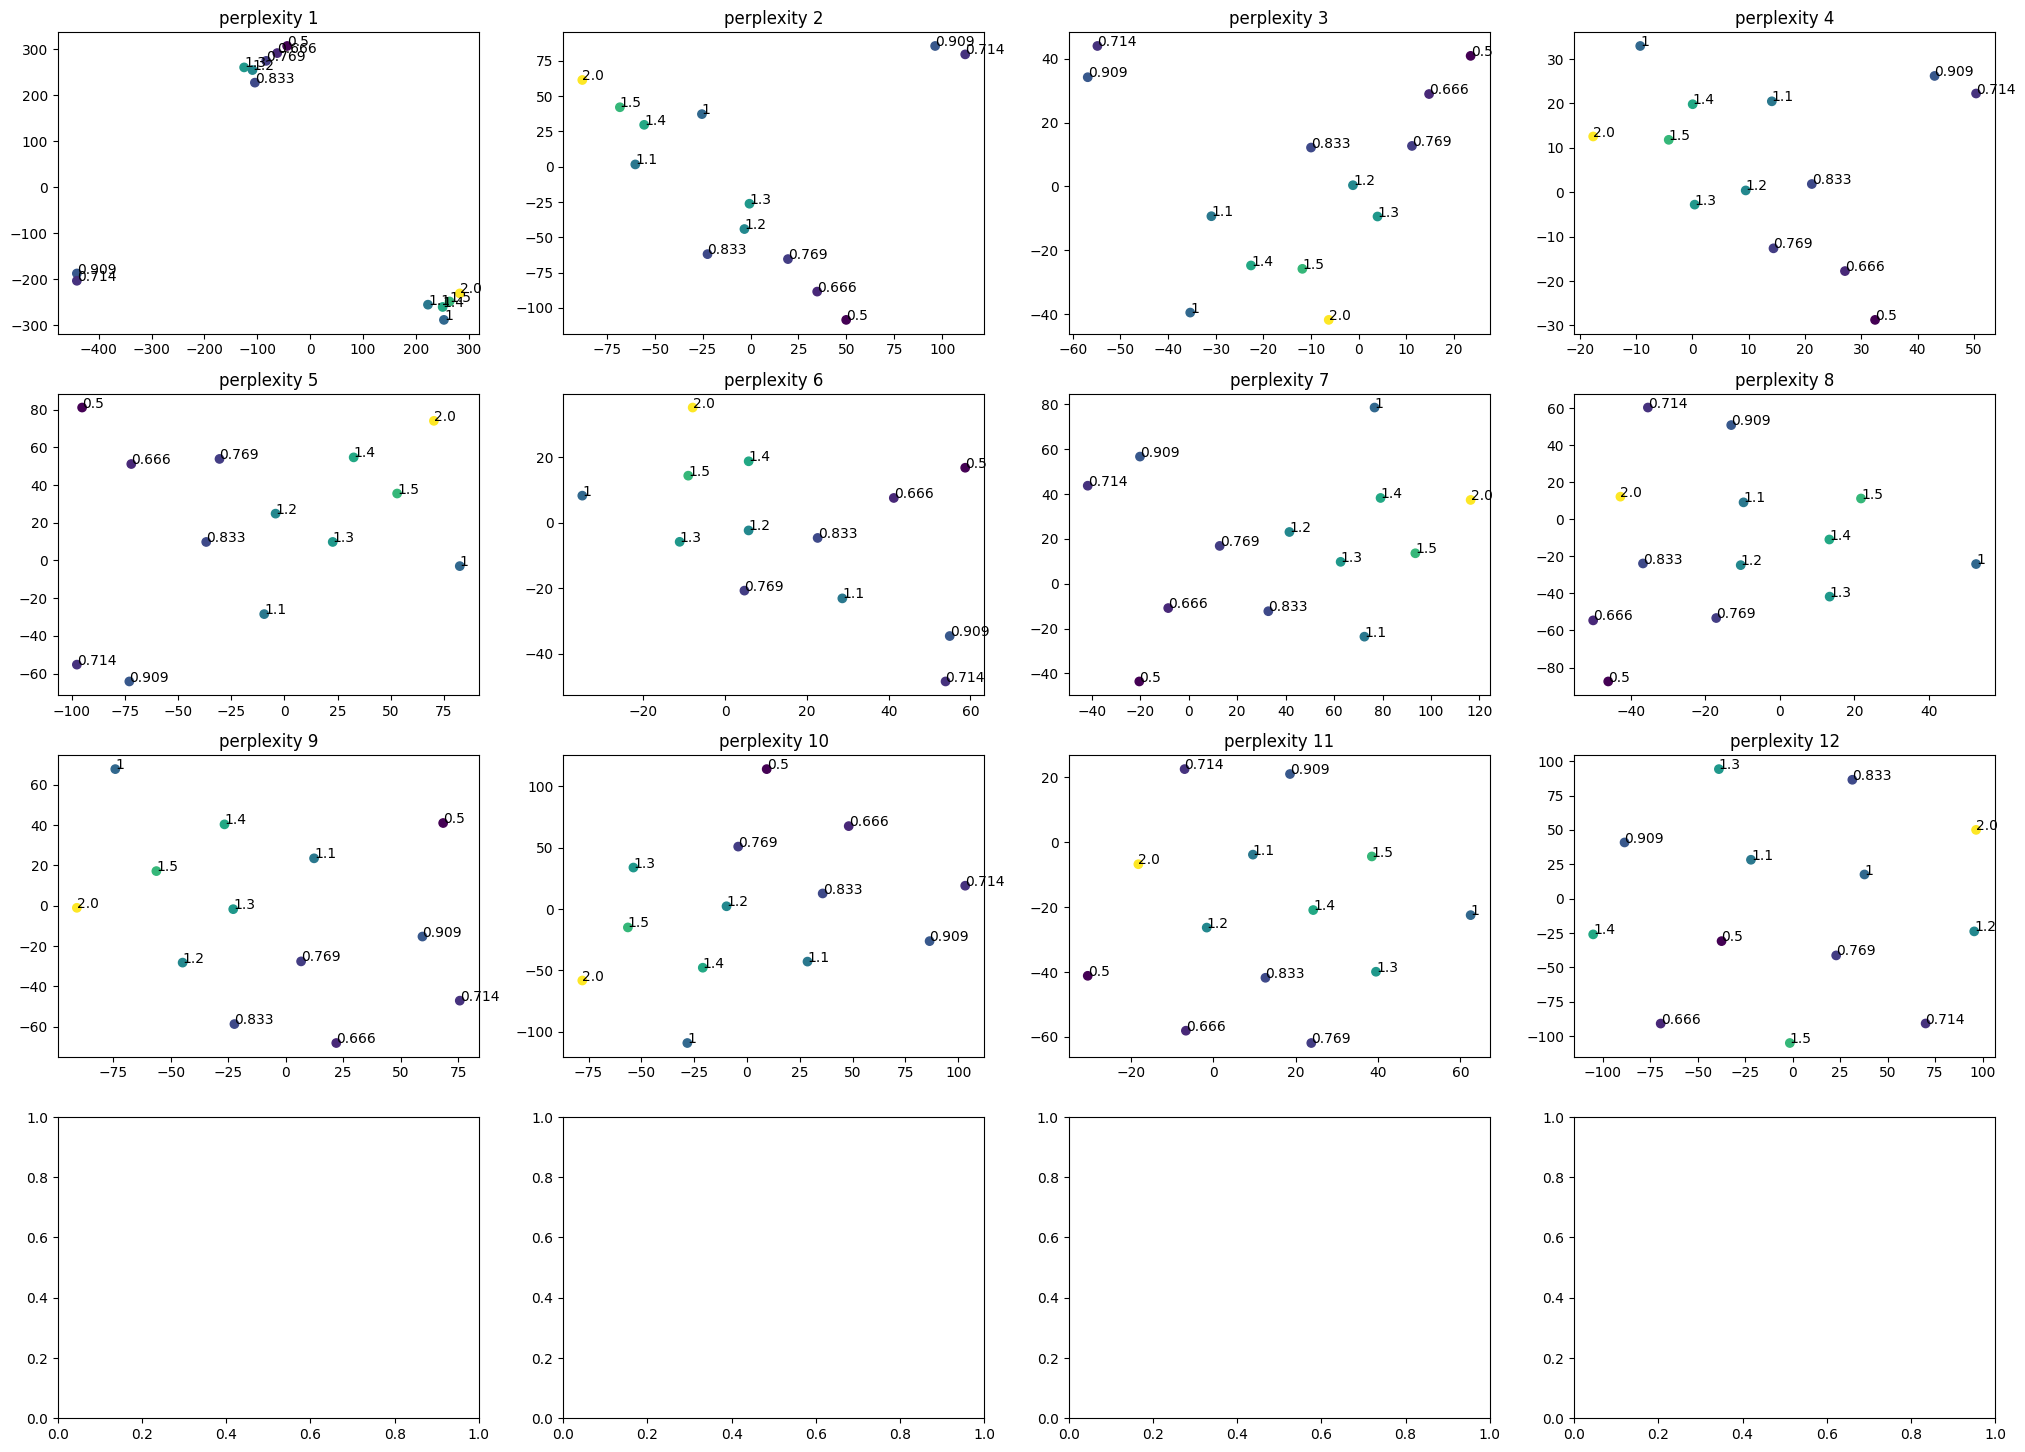

In [ ]:
df = pd.read_csv("metadata.csv")
files = df["file"]
file = list(set(files))

fig, axes = plt.subplots(4, 4, figsize=(25,18))
axes = axes.flatten()

for i in range(1,13):
    
    p = min(26, 2*i - 1)
    p = i

    embeds = []
    labels = []
    tracks = []
    embeds_id = df[ (df["transf"]=="identity") &
                (df["file"]==file) ]["file_embeds_path"]
    if len(embeds_id)==1:
        embeds.append(np.load(embeds_id.iloc[0])[0])
        labels.append(1)
        tracks.append(file)
    embeds_df = df[ (df["transf"]==TRANSF) &
                (df["file"]==file)]
    for _, row in embeds_df.iterrows():
        embeds.append(np.load(row["file_embeds_path"])[0])
        labels.append(float(row["transf_param_name"]))
        tracks.append(row["file"])
    
    tsne = TSNE(n_components=2, perplexity=p)
    x = np.vstack(embeds)
    x2d = tsne.fit_transform(x)

    axes[i-1].scatter(x2d[:,0], x2d[:,1], c=labels)
    axes[i-1].set_title(f"perplexity {p}")

    for j in range(x2d.shape[0]):
        axes[i-1].text(x2d[j,0], x2d[j,1], labels[j])

    # axes[i-1].text(x2d[0,0], x2d[0,1], "O")
    

plt.show()


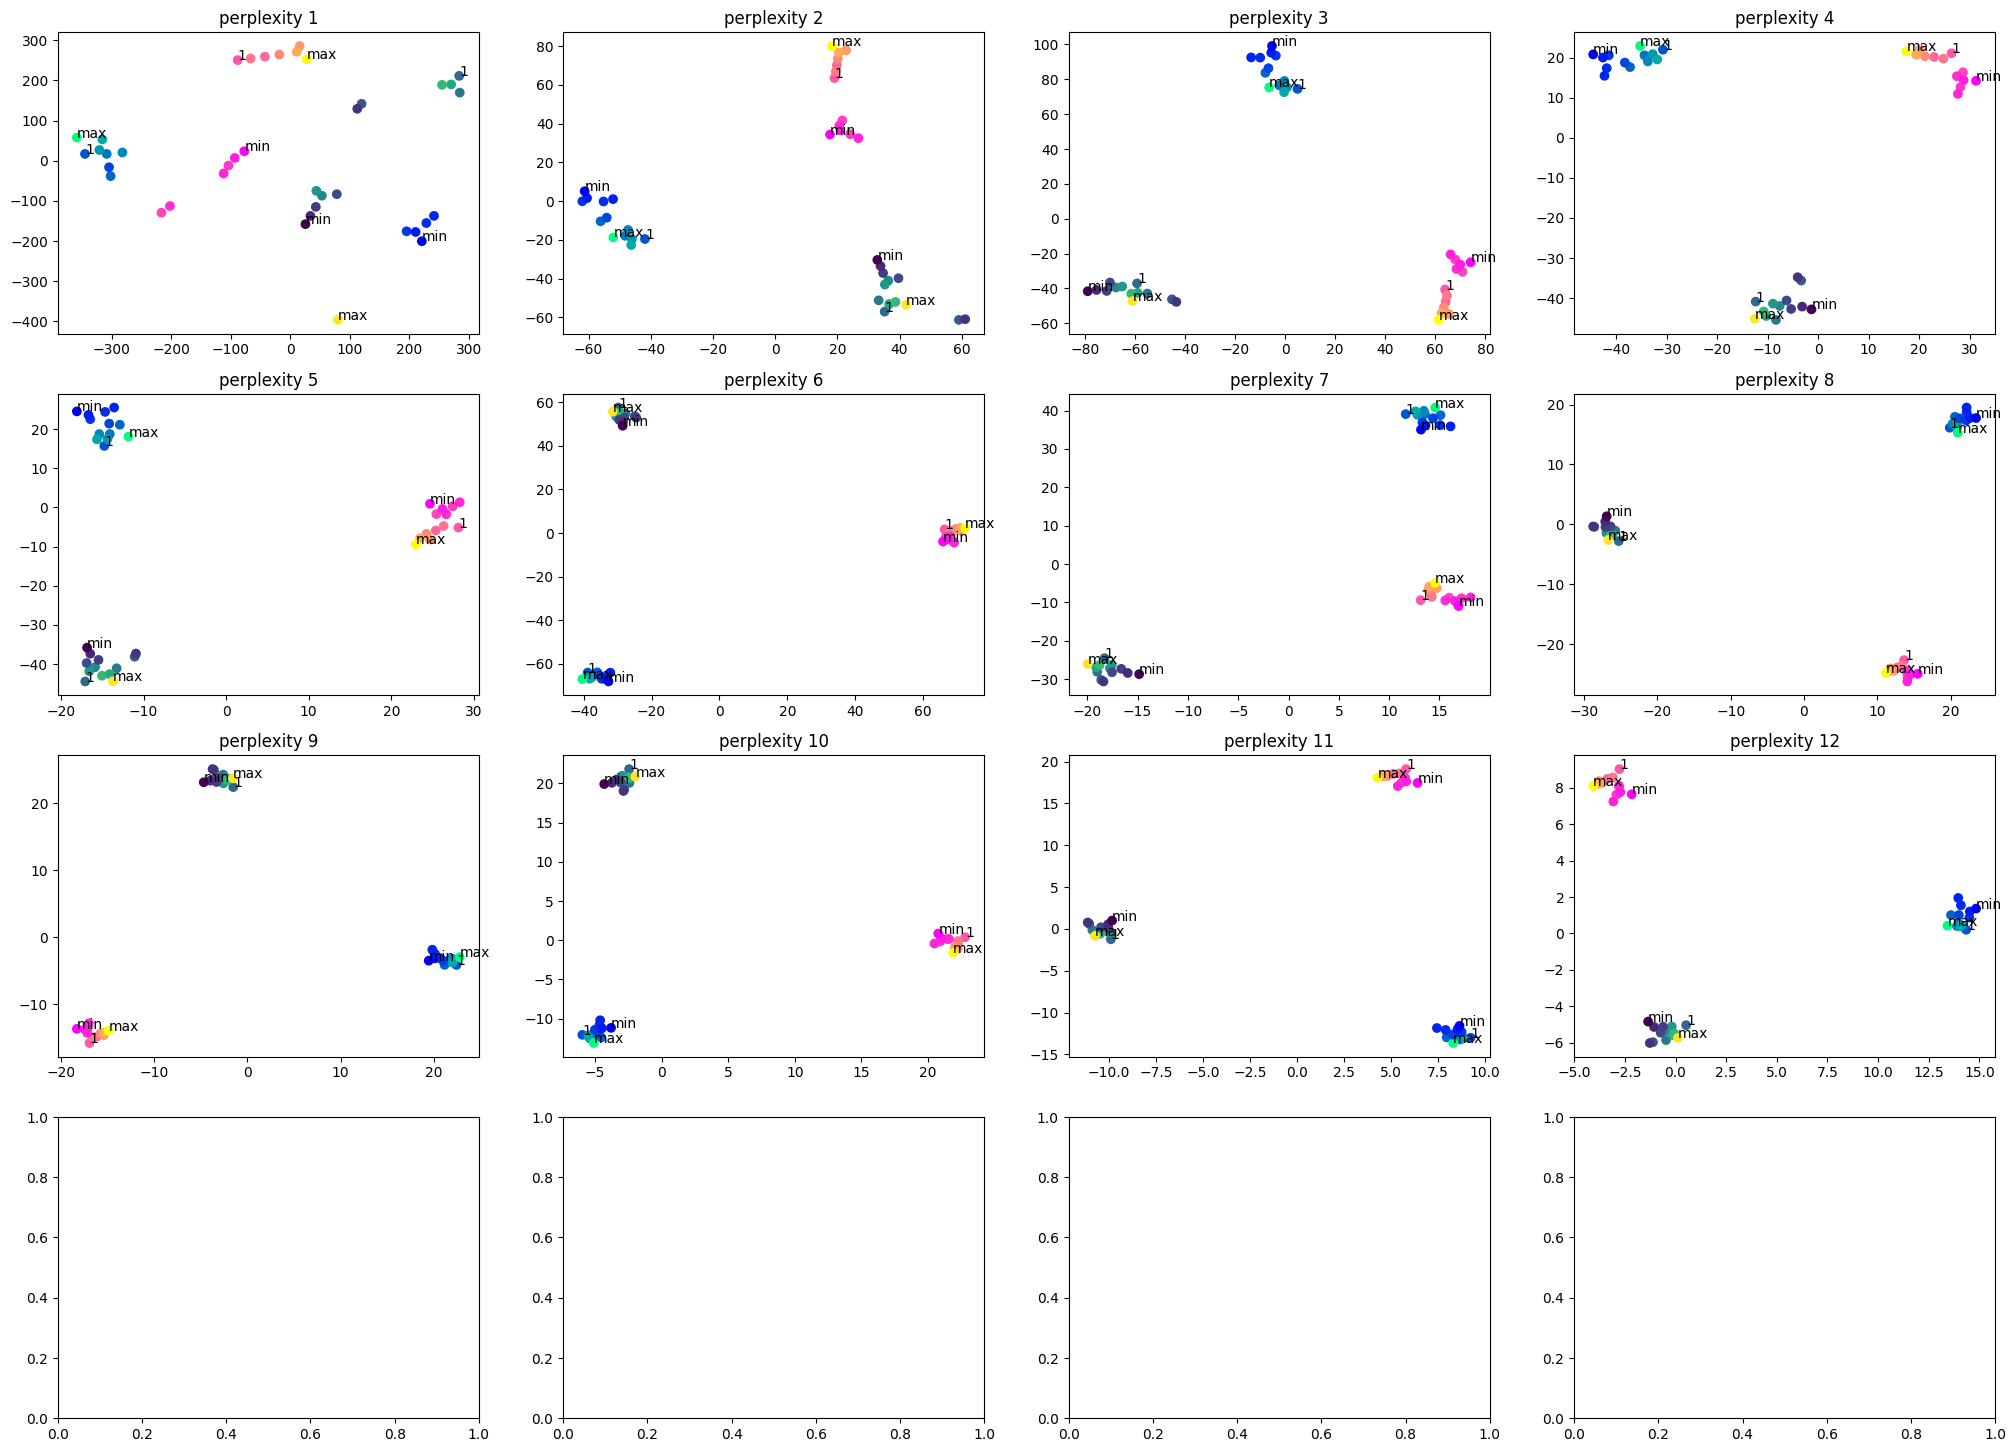

In [152]:
df = pd.read_csv("metadata.csv")
files = df["file"]
files = list(set(files))

cmap_list = ["viridis",
"spring", "winter",
"cool",
"autumn"]

fig, axes = plt.subplots(4, 4, figsize=(25,18))
axes = axes.flatten()

n_files = 3

for i in range(1,13):
    
    p = min(26, 2*i - 1)
    p = i

    tsne = TSNE(n_components=2, perplexity=p)

    embeds = []
    labels = []
    tracks = []

    for _, file in enumerate(files[:n_files]):


        embeds_id = df[ (df["transf"]=="identity") &
                    (df["file"]==file) ]["file_embeds_path"]
        if len(embeds_id)==1:
            embeds.append(np.load(embeds_id.iloc[0])[0])
            labels.append(1)
            tracks.append(file)
        embeds_df = df[ (df["transf"]==TRANSF) &
                    (df["file"]==file)]
        for _, row in embeds_df.iterrows():
            embeds.append(np.load(row["file_embeds_path"])[0])
            labels.append(float(row["transf_param_name"]))
            tracks.append(row["file"])
        
        
    x = np.vstack(embeds)
    x2d = tsne.fit_transform(x)

    k = -1
    n_tfs = (int)(x2d.shape[0]/n_files)
    
    for j in range(x2d.shape[0]):
        if labels[j]==1:
            k += 1
            axes[i-1].scatter(x2d[j:j+n_tfs,0], x2d[j:j+n_tfs,1], c=labels[j:j+n_tfs], cmap=cmap_list[k])
        if (labels[j]==2):
            # axes[i-1].text(x2d[j,0], x2d[j,1], labels[j])
            axes[i-1].text(x2d[j,0], x2d[j,1], "max")
        if (labels[j]==0.5):
            axes[i-1].text(x2d[j,0], x2d[j,1], "min")
        if (labels[j]==1):
            axes[i-1].text(x2d[j,0], x2d[j,1], "1")
        
    axes[i-1].set_title(f"perplexity {p}")

plt.show()

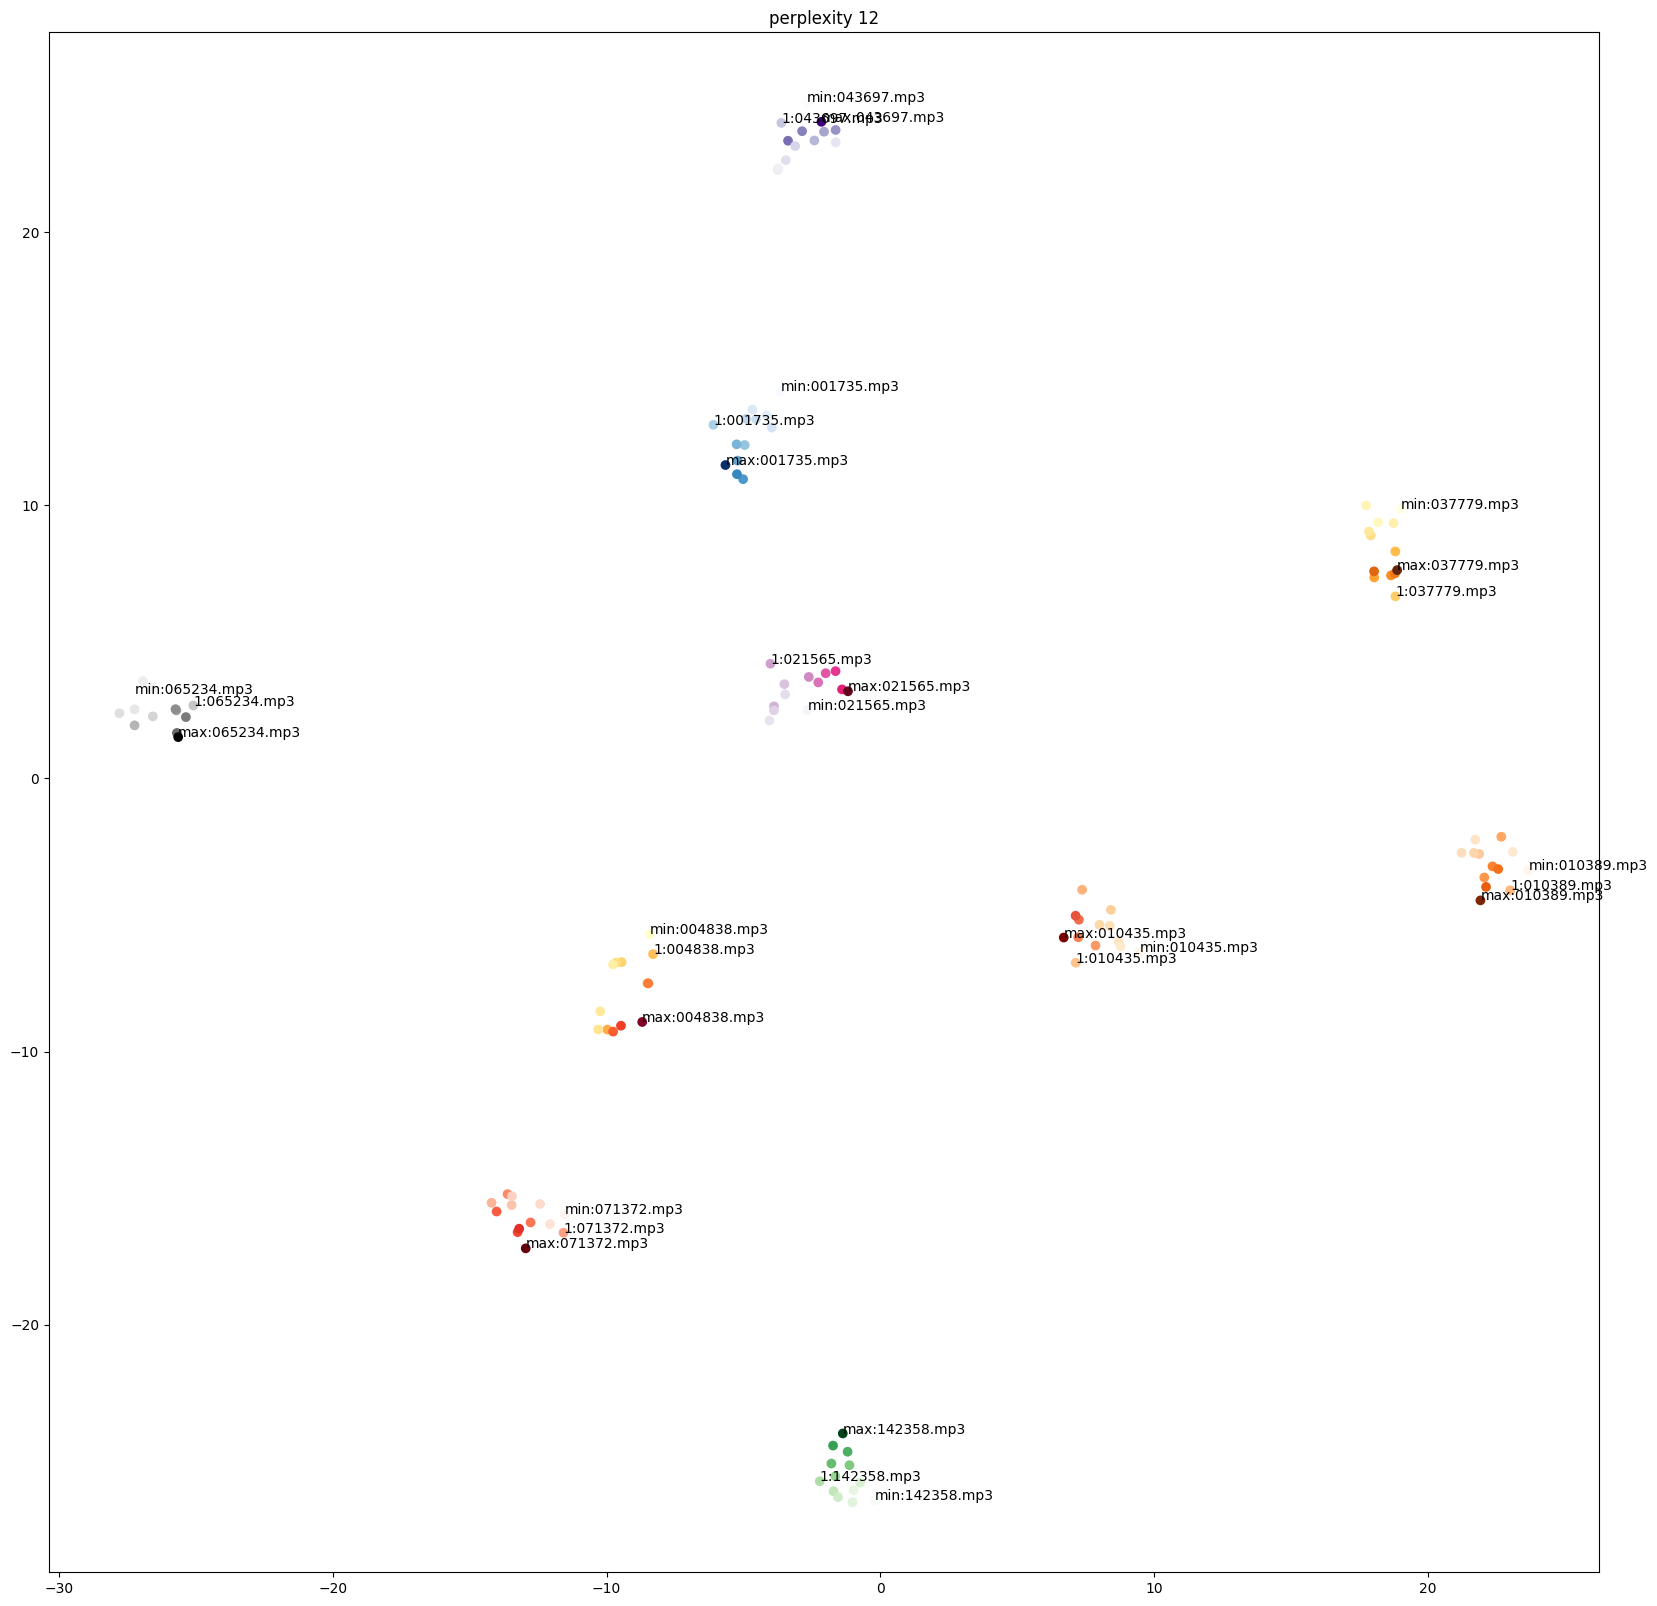

In [7]:
df = pd.read_csv("metadata.csv")
files = df["file"]
files = list(set(files))

cmap_list = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

n_files = 10
p = 12

tsne = TSNE(n_components=2, perplexity=p)
plt.figure(figsize=(20,20))


embeds = []
labels = []
tracks = []

for _, file in enumerate(files[:n_files]):

    embeds_id = df[ (df["transf"]=="identity") &
                (df["file"]==file) ]["file_embeds_path"]
    if len(embeds_id)==1:
        embeds.append(np.load(embeds_id.iloc[0])[0])
        labels.append(1)
        tracks.append(file)
    embeds_df = df[ (df["transf"]==TRANSF) &
                (df["file"]==file)]
    for _, row in embeds_df.iterrows():
        embeds.append(np.load(row["file_embeds_path"])[0])
        labels.append(float(row["transf_param_name"]))
        tracks.append(row["file"])
    
x = np.vstack(embeds)
x2d = tsne.fit_transform(x)

k = -1
n_tfs = (int)(x2d.shape[0]/n_files)

for j in range(x2d.shape[0]):
    if labels[j]==1:
        k += 1
        plt.scatter(x2d[j:j+n_tfs,0], x2d[j:j+n_tfs,1], c=labels[j:j+n_tfs], cmap=cmap_list[k])
    if (labels[j]==2):
        # axes[i-1].text(x2d[j,0], x2d[j,1], labels[j])
        plt.text(x2d[j,0], x2d[j,1], f"max:{tracks[j]}")
    if (labels[j]==0.5):
        plt.text(x2d[j,0], x2d[j,1], f"min:{tracks[j]}")
    if (labels[j]==1):
        plt.text(x2d[j,0], x2d[j,1], f"1:{tracks[j]}")
    
plt.title(f"perplexity {p}")
plt.show()

In [3]:
df = pd.read_csv("metadata.csv")
files = list(set(df["file"]))
print(files[:10])
for file in files[:10]:
    path = df[(df["transf"]=="identity") &
                (df["file"]==file) ]["file_path"].iloc[0]
    print(path)

['065234.mp3', '043697.mp3', '001735.mp3', '142358.mp3', '010389.mp3', '071372.mp3', '037779.mp3', '004838.mp3', '010435.mp3', '021565.mp3']
/home/gpu1/datasets/fma/fma_small/fma_pool/065234.mp3
/home/gpu1/datasets/fma/fma_small/fma_pool/043697.mp3
/home/gpu1/datasets/fma/fma_small/fma_pool/001735.mp3
/home/gpu1/datasets/fma/fma_small/fma_pool/142358.mp3
/home/gpu1/datasets/fma/fma_small/fma_pool/010389.mp3
/home/gpu1/datasets/fma/fma_small/fma_pool/071372.mp3
/home/gpu1/datasets/fma/fma_small/fma_pool/037779.mp3
/home/gpu1/datasets/fma/fma_small/fma_pool/004838.mp3
/home/gpu1/datasets/fma/fma_small/fma_pool/010435.mp3
/home/gpu1/datasets/fma/fma_small/fma_pool/021565.mp3
